In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
experiment = "inverse_lansing2"
df = pd.read_csv(f"{experiment}/0/visor/inverse_lansing.csv", header=None)
q1 = df.iloc[:, 102:]
q0 = df.iloc[:, 2:102]

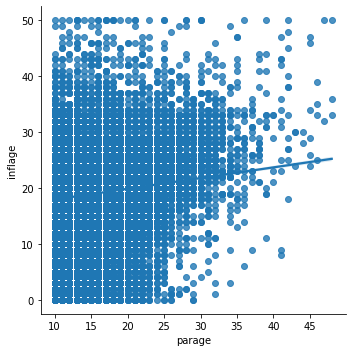

In [80]:
data05 = pd.DataFrame()
data05["stage"] = df[0].astype(int)
data05["parage"] = df[1].astype(int)
data05["parq"] = q0.T.cumprod().ge(0.5).apply(lambda x: np.argmin(x)) 
data05["inflage"] = q1.T.cumprod().ge(0.5).apply(lambda x: np.argmin(x)) 
sns.lmplot(data=data05, x = "parage", y="inflage")

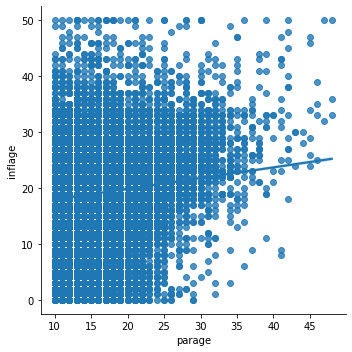

In [130]:
perc = 0.5

data = pd.DataFrame()
data["stage"] = df[0].astype(int)
data["parage"] = df[1].astype(int)
data["parq"] = q0.T.cumprod().ge(perc).apply(lambda x: np.argmin(x)) 
data["inflage"] = q1.T.cumprod().ge(perc).apply(lambda x: np.argmin(x)) 
sns.lmplot(data=data, x = "parage", y="inflage")

In [131]:
def si(x,y):
    slope = (len(x) * np.sum(x*y) - np.sum(x) * np.sum(y)) / (len(x)*np.sum(x*x) - np.sum(x) ** 2)
    intercept = (np.sum(y) - slope*np.sum(x)) / len(x)
    return slope, intercept

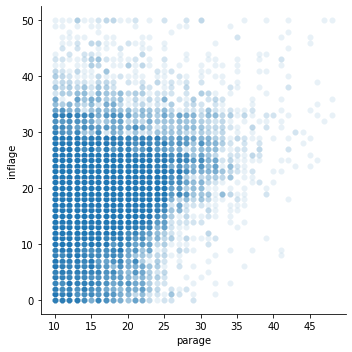

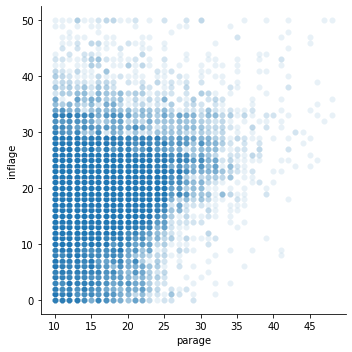

In [132]:
sns.relplot(data=data05, x="parage", y="inflage", alpha=0.1)
sns.relplot(data=data, x="parage", y="inflage", alpha=0.1)

In [133]:
linreg = pd.DataFrame()
linreg["stage"] = data.stage.unique()
sis = [si(data[data.stage == stage].parage, data[data.stage == stage].inflage) for stage in linreg.stage]

linreg[["slope", "intercept"]] = sis
linreg["number"] = data.groupby('stage').count().parage.tolist()


In [134]:
si(data.parage, data.inflage)

(0.1914001444674442, 16.041912643459693)

<AxesSubplot:xlabel='stage', ylabel='intercept'>

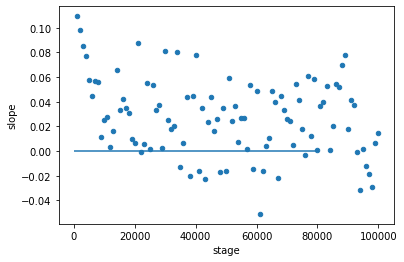

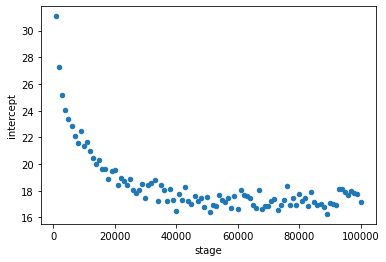

In [135]:
linreg.plot.scatter("stage", "slope")
plt.hlines(0, 0, 80000)
linreg.plot.scatter("stage", "intercept")

In [139]:
linreg[50:].slope.median()

0.02421689820383141

<AxesSubplot:xlabel='parq', ylabel='inflage'>

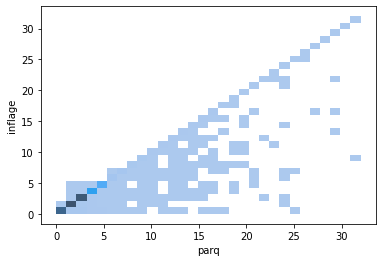

In [112]:
sns.histplot(data, x="parq", y="inflage", bins=30)

In [141]:
sns.boxplot(x="day", y="total_bill",
            hue="smoker", palette=["m", "g"],
            data=tips)

,stage,slope,intercept,number
0,1000,0.109325,31.080117,728
1,2000,0.098344,27.275425,818
2,3000,0.084979,25.175034,693
3,4000,0.077414,24.046371,681
4,5000,0.057670,23.343628,693
...,...,...,...,...
95,96000,-0.012105,17.670787,632
96,97000,-0.018258,18.006343,626
97,98000,-0.028979,17.868737,594
98,99000,0.006193,17.771834,610


<AxesSubplot:xlabel='group', ylabel='slope'>

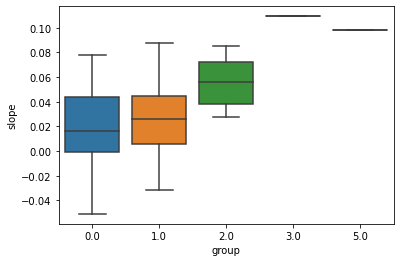

In [152]:
boxdata = linreg.copy()

boxdata["group"] = np.floor((boxdata.number - boxdata.number.min()) / (boxdata.number.max() - boxdata.number.min()) * 5)

sns.boxplot(x="group", y="slope", data=boxdata)


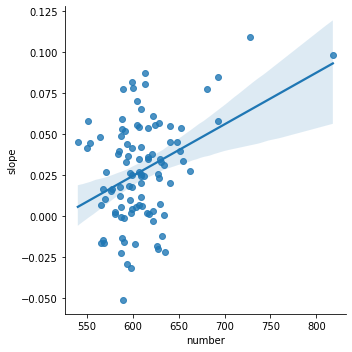

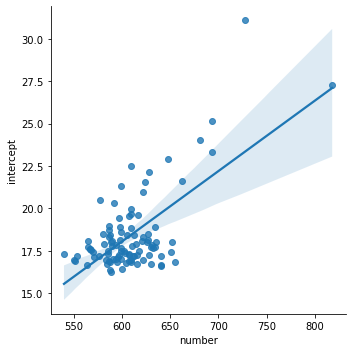

In [140]:
sns.lmplot(linreg, x="number", y="slope")
sns.lmplot(linreg, x="number", y="intercept")

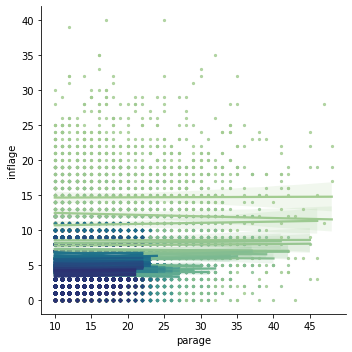

In [75]:
sns.lmplot(data=data, x = "parage", y="inflage", hue="stage", palette="crest", scatter_kws={"s": 5}, legend=False)